# Agrupamento: KNN
# ________________________________________

### KNN - Implementado

#### Os modelos k-NN funcionam pegando um ponto de dados e observando os 'k' pontos de dados rotulados mais próximos. O ponto de dados recebe então o rótulo da maioria dos 'k' pontos mais próximos.

## Importando bibliotecas ##

In [2]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from collections import Counter
import numpy as np
from IPython.display import Image

## Setup dos dados ##

In [2]:
iris = pd.read_csv("data/iris.csv")
X = iris.drop('Species',axis=1)
y = iris.Species

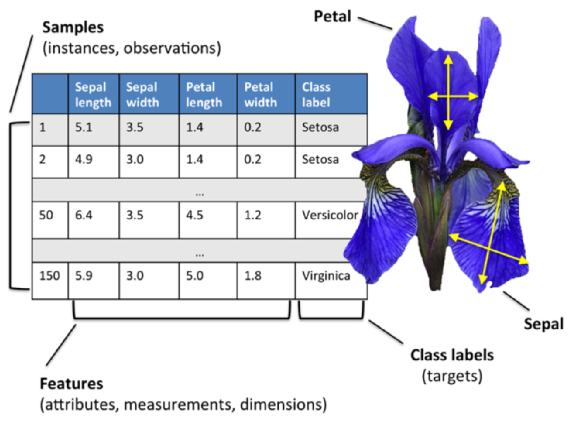

In [3]:
Image(filename ="static/iris-data-set.png", width=500, height=500)

In [3]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [4]:
y = y.apply(converte_classe)
y.value_counts()

1    50
2    50
0    50
Name: Species, dtype: int64

In [5]:
iris['target'] = y
y = np.array(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Escalando os dados ##

In [6]:
escalar = Normalizer()
escalar.fit(X)
X_escala = escalar.transform(X)

## Visualizando a Transformação dos Dados ##

Text(0.5, 1.08, 'Depois de Normalizar')

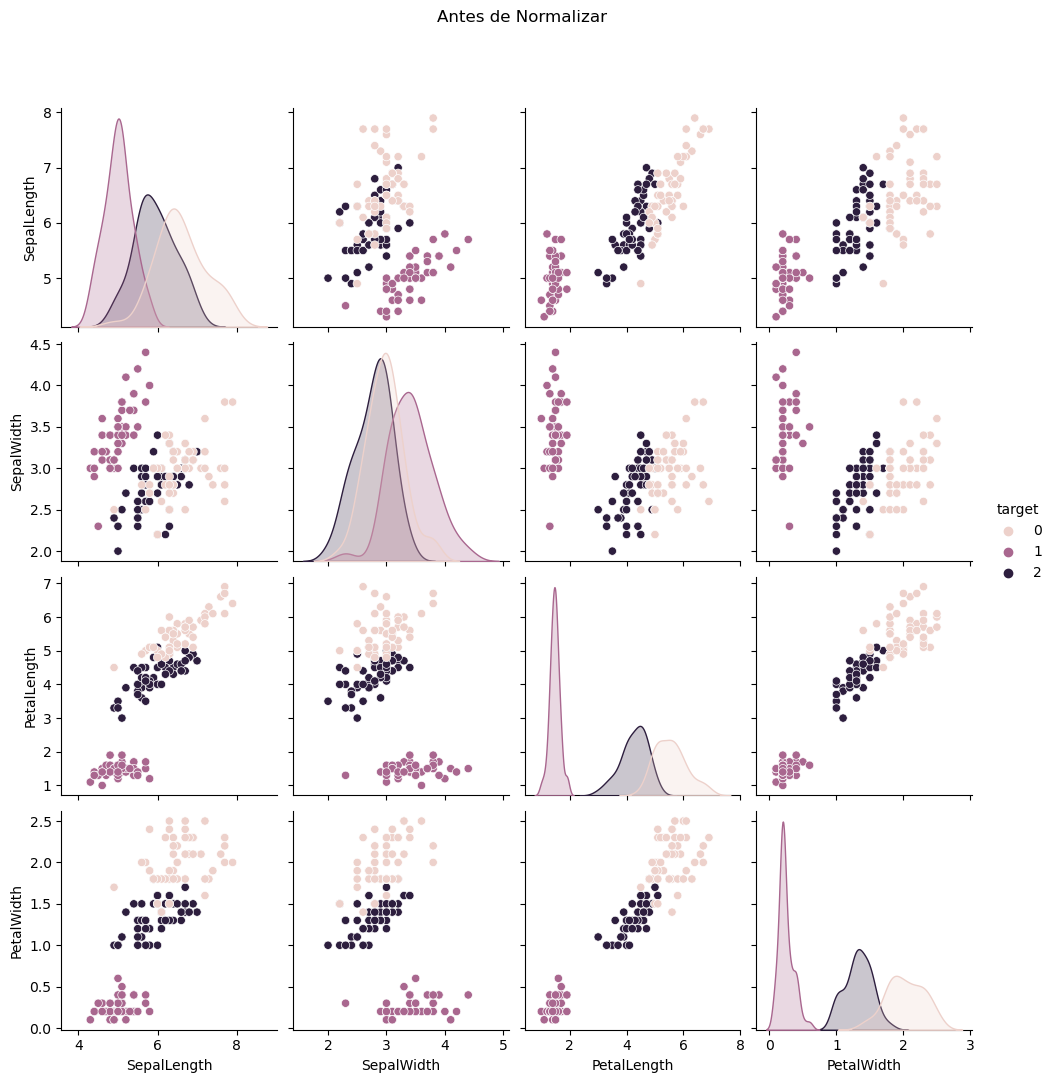

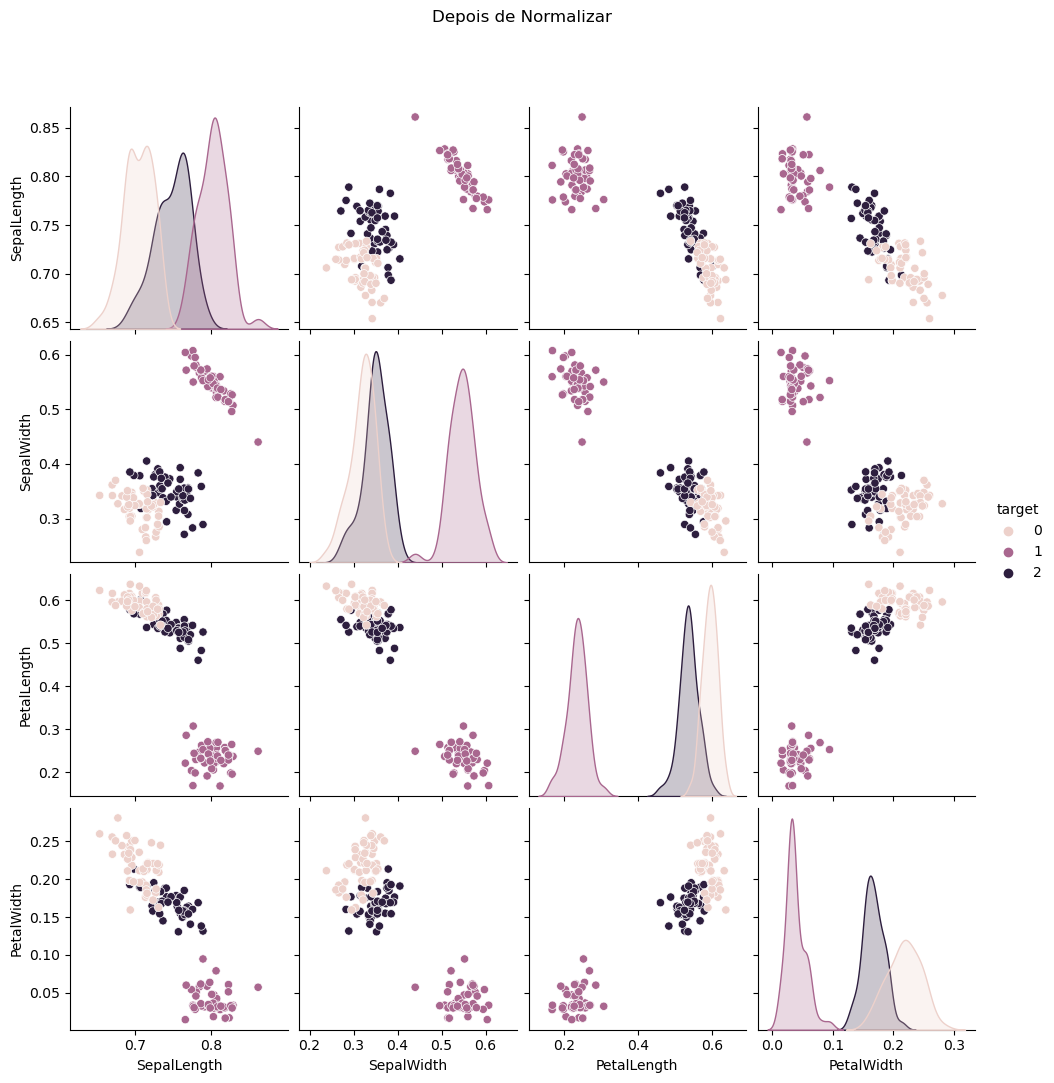

In [7]:
dicionario= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'}

antes = sns.pairplot(iris.drop('Species',axis=1), hue= 'target')
antes.fig.suptitle('Antes de Normalizar', y=1.08)


iris_df_normal = pd.DataFrame()
iris_df_normal['SepalLength'] = [X_escala[i][0] for i in range(len(X_escala))]
iris_df_normal['SepalWidth'] = [X_escala[i][1] for i in range(len(X_escala))]
iris_df_normal['PetalLength'] = [X_escala[i][2] for i in range(len(X_escala))]
iris_df_normal['PetalWidth'] = [X_escala[i][3] for i in range(len(X_escala))]
iris_df_normal['target'] = y



depois = sns.pairplot(iris_df_normal, hue= 'target')
depois.fig.suptitle('Depois de Normalizar', y=1.08)

## Separando Treinamento e Teste ##

In [9]:
x_train, x_test, y_train, y_test= train_test_split(X_escala, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #evitar viez
                                                   random_state= 0)

##  Implementação 

In [10]:
def d_euclidiana(x_train, ponto_x_test):

  distancias = []
  for row in range(len(x_train)):
      ponto_atual = x_train[row]
      distancia_atual = 0

      for col in range(len(ponto_atual)):
          distancia_atual += (ponto_atual[col] - ponto_x_test[col]) **2
            
      distancia_atual = np.sqrt(distancia_atual)

      distancias.append(distancia_atual)

  distancias = pd.DataFrame(data=distancias, columns=['dist'])
  return distancias

In [11]:
def nearest_neighbors(distancia_ponto, K):

    df_nearest= distancia_ponto.sort_values(by=['dist'], axis=0)
    df_nearest= df_nearest[:K]
    
    return df_nearest

In [13]:
def escolhe(df_nearest, y_train):
    contador = Counter(y_train[df_nearest.index])
    y_pred= contador.most_common()[0][0]

    return y_pred

In [14]:
def KNN(x_train, y_train, x_test, K):

    y_pred=[]

    for x_test_point in x_test:
        distancia_ponto  = d_euclidiana(x_train, x_test_point)
        df_ponto_proximo = nearest_neighbors(distancia_ponto, K)
        y_pred_ponto = escolhe(df_ponto_proximo, y_train)
        y_pred.append(y_pred_ponto)

    return y_pred  

## Avaliação 

In [15]:
K=3
y_pred = KNN(x_train, y_train,x_test, K)
print(y_pred)

[0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1]


In [16]:
print(y_test.tolist())

[0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1]


In [17]:
print(f'A Acurácia observada no teste foi de: {accuracy_score(y_test, y_pred)}')
print('Matriz de Confusao Teste')
confusion_matrix(y_test, y_pred)

A Acurácia observada no teste foi de: 0.9666666666666667
Matriz de Confusao Teste


array([[ 6,  0,  0],
       [ 0, 11,  0],
       [ 1,  0, 12]], dtype=int64)